•	Describe the dataset and any issues with it. 

•	Generate a minimum of 5 unique visualizations using the data and write a brief description of your observations. Additionally, all attempts should be made to make the visualizations visually appealing

•	Create a feature set and create a model which predicts interest_rate using at least 2 algorithms. Describe any data cleansing that must be performed and analysis when examining the data.

•	Visualize the test results and propose enhancements to the model, what would you do if you had more time. Also describe assumptions you made and your approach.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.float_format',lambda x : '%.4f' % x)

In [3]:
data_raw = pd.read_csv('loans_full_schema.csv')
data = data_raw.copy()

In [4]:
data.shape

(10000, 55)

In [5]:
data.head(5).append(data.tail(5))

/var/folders/8f/zn20y3z53vj3ln91y64pcf2w0000gn/T/ipykernel_71872/488740907.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data.head(5).append(data.tail(5))


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0000,NJ,MORTGAGE,90000.0000,Verified,18.0100,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.8600,1999.3300,984.1400,1015.1900,0.0000
1,warehouse office clerk,10.0000,HI,RENT,40000.0000,Not Verified,5.0400,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.3700,499.1200,348.6300,150.4900,0.0000
2,assembly,3.0000,WI,RENT,40000.0000,Source Verified,21.1500,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.6300,281.8000,175.3700,106.4300,0.0000
3,customer service,1.0000,PA,RENT,30000.0000,Not Verified,10.1600,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.2600,3312.8900,2746.7400,566.1500,0.0000
4,security supervisor,10.0000,CA,RENT,35000.0000,Verified,57.9600,57000.0000,Verified,37.6600,...,C3,Mar-2018,Current,whole,Cash,21430.1500,2324.6500,1569.8500,754.8000,0.0000
9995,owner,10.0000,TX,RENT,108000.0000,Source Verified,22.2800,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.3400,2969.8000,2413.6600,556.1400,0.0000
9996,director,8.0000,PA,MORTGAGE,121000.0000,Verified,32.3800,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.4400,1456.3100,852.5600,603.7500,0.0000
9997,toolmaker,10.0000,CT,MORTGAGE,67000.0000,Verified,45.2600,107000.0000,Source Verified,29.5700,...,E2,Feb-2018,Current,fractional,Cash,27617.6500,4620.8000,2382.3500,2238.4500,0.0000
9998,manager,1.0000,WI,MORTGAGE,80000.0000,Source Verified,11.9900,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.1200,2873.3100,2481.8800,391.4300,0.0000
9999,operations analyst,3.0000,CT,RENT,66000.0000,Not Verified,20.8200,NaN,NaN,NaN,...,B4,Feb-2018,Current,whole,Cash,11574.8300,1658.5600,1225.1700,433.3900,0.0000


In [6]:
meta_dict = []
for col in data.columns:
    # if data[col].dtype == 'int64':
    #     ordinal_cols.append(col)
    type = data[col].dtype
    unique = 0
    if type == 'object':
        unique = len(data[col].unique())
    NAs = data[col].isnull().sum()
    NA_prop = NAs / len(data[col]) * 100
    dict_tmp = {'Name': col, 'Type': type, 'Unique': unique, 'NAs': NAs, 'NA%': NA_prop}
    meta_dict.append(dict_tmp)

In [7]:
meta = pd.DataFrame(meta_dict)
meta = meta.set_index('Name').drop('interest_rate')

In [8]:
meta.sort_values('NA%', ascending=False)

,Type,Unique,NAs,NA%
Name,,,,
verification_income_joint,object,4,8545,85.4500
debt_to_income_joint,float64,0,8505,85.0500
annual_income_joint,float64,0,8505,85.0500
months_since_90d_late,float64,0,7715,77.1500
months_since_last_delinq,float64,0,5658,56.5800
months_since_last_credit_inquiry,float64,0,1271,12.7100
emp_title,object,4742,833,8.3300
emp_length,float64,0,817,8.1700
num_accounts_120d_past_due,float64,0,318,3.1800


In [9]:
# column names of columns having more than 50% missing values
high_NA = meta[meta['NA%'] > 50].index
high_NA

Index(['annual_income_joint', 'verification_income_joint',
       'debt_to_income_joint', 'months_since_last_delinq',
       'months_since_90d_late'],
      dtype='object', name='Name')

In [10]:
meta_new = meta[meta['NA%'] <= 50]
# meta_new.sort_values('NA%', ascending=False)

In [11]:
pd.DataFrame({'Number of variables': meta_new.groupby('Type').size()})

,Number of variables
Type,
int64,25
float64,12
object,12


In [12]:
meta_new.sort_values('NA%', ascending=False)

,Type,Unique,NAs,NA%
Name,,,,
months_since_last_credit_inquiry,float64,0,1271,12.7100
emp_title,object,4742,833,8.3300
emp_length,float64,0,817,8.1700
num_accounts_120d_past_due,float64,0,318,3.1800
debt_to_income,float64,0,24,0.2400
term,int64,0,0,0.0000
num_mort_accounts,int64,0,0,0.0000
account_never_delinq_percent,float64,0,0,0.0000
tax_liens,int64,0,0,0.0000


In [13]:
# `emp_title` has too many unique text values, so I drop it
meta_new = meta_new.drop('emp_title')
meta_new.shape

(48, 4)

### Statistical Attributes of Variables

In [14]:
data[meta_new[meta_new.Type == 'float64'].index].describe().T

,count,mean,std,min,25%,50%,75%,max
emp_length,9183.0000,5.9303,3.7037,0.0000,2.0000,6.0000,10.0000,10.0000
annual_income,10000.0000,79222.1484,64734.2905,0.0000,45000.0000,65000.0000,95000.0000,2300000.0000
debt_to_income,9976.0000,19.3082,15.0049,0.0000,11.0575,17.5700,25.0025,469.0900
months_since_last_credit_inquiry,8729.0000,7.3407,5.9816,0.0000,2.0000,6.0000,11.0000,24.0000
num_accounts_120d_past_due,9682.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
account_never_delinq_percent,10000.0000,94.6490,9.1551,14.3000,92.6000,100.0000,100.0000,100.0000
installment,10000.0000,476.2053,294.8516,30.7500,256.0400,398.4200,644.6900,1566.5900
balance,10000.0000,14458.9166,9964.5619,0.0000,6679.0650,12379.4950,20690.1825,40000.0000
paid_total,10000.0000,2494.2348,3958.2304,0.0000,928.7000,1563.3000,2616.0050,41630.4437
paid_principal,10000.0000,1894.4485,3884.4072,0.0000,587.1000,984.9900,1694.5550,40000.0000


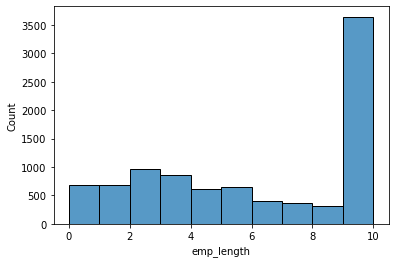

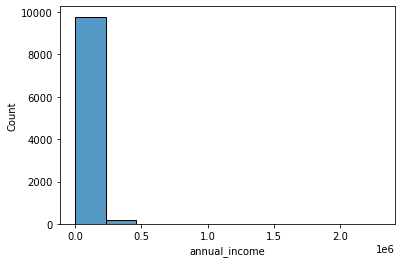

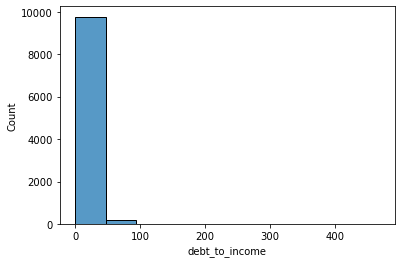

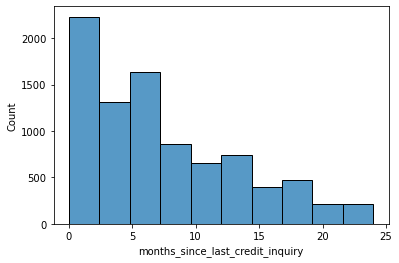

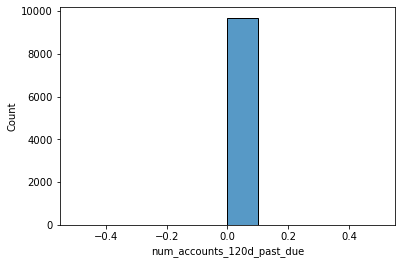

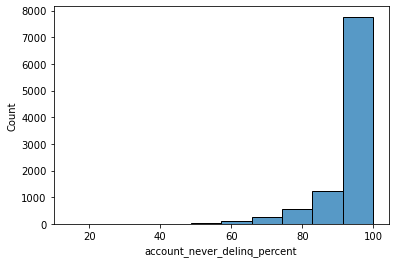

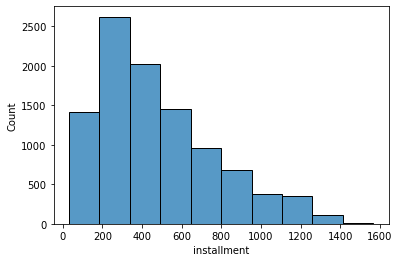

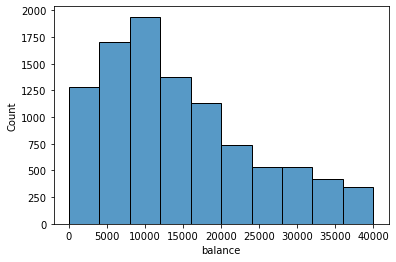

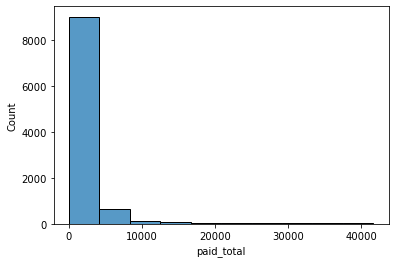

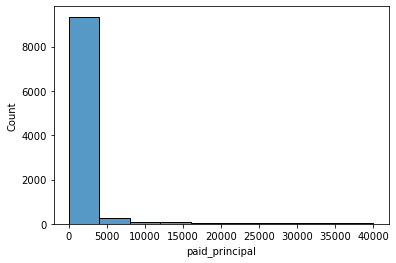

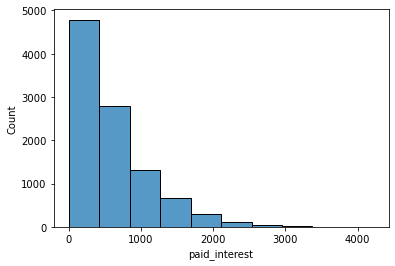

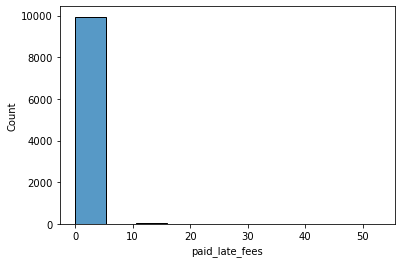

In [15]:
for col in meta_new[meta_new.Type == 'float64'].index:
    plt.figure()
    sns.histplot(data[col],bins=10)
    plt.show()

In [16]:
data[meta_new[meta_new.Type == 'int64'].index].describe().T

,count,mean,std,min,25%,50%,75%,max
delinq_2y,10000.0000,0.2160,0.6837,0.0000,0.0000,0.0000,0.0000,13.0000
earliest_credit_line,10000.0000,2001.2900,7.7955,1963.0000,1997.0000,2003.0000,2006.0000,2015.0000
inquiries_last_12m,10000.0000,1.9582,2.3801,0.0000,0.0000,1.0000,3.0000,29.0000
total_credit_lines,10000.0000,22.6796,11.8854,2.0000,14.0000,21.0000,29.0000,87.0000
open_credit_lines,10000.0000,11.4044,5.8683,0.0000,7.0000,10.0000,14.0000,51.0000
total_credit_limit,10000.0000,183606.2304,187632.7078,0.0000,51593.7500,114667.0000,267550.0000,3386034.0000
total_credit_utilized,10000.0000,51049.0631,53636.7312,0.0000,19185.5000,36927.0000,65421.0000,942456.0000
num_collections_last_12m,10000.0000,0.0138,0.1265,0.0000,0.0000,0.0000,0.0000,3.0000
num_historical_failed_to_pay,10000.0000,0.1671,0.6878,0.0000,0.0000,0.0000,0.0000,52.0000
current_accounts_delinq,10000.0000,0.0001,0.0100,0.0000,0.0000,0.0000,0.0000,1.0000


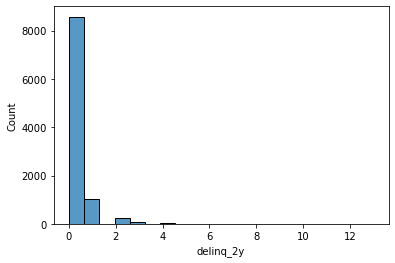

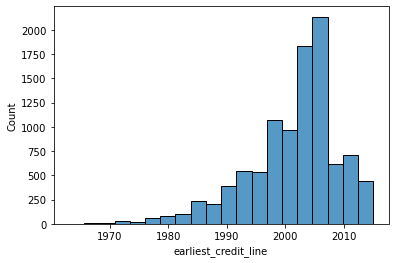

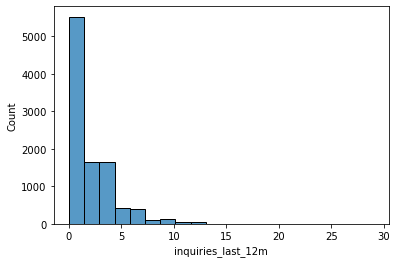

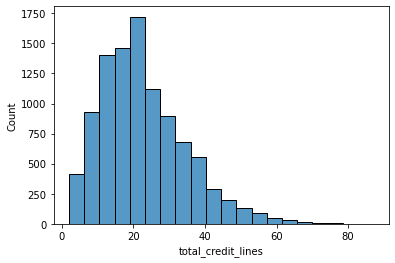

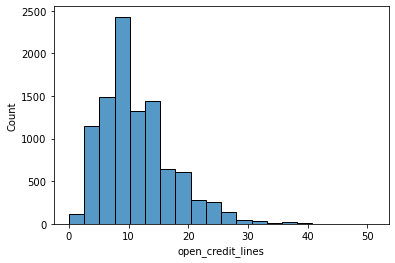

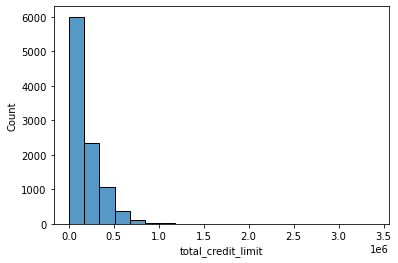

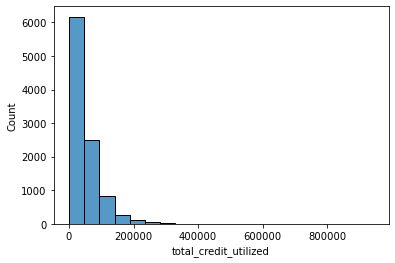

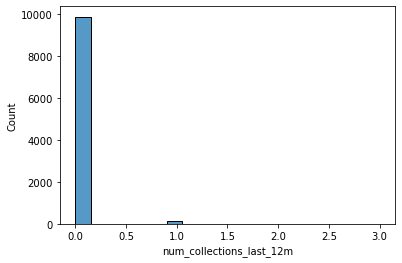

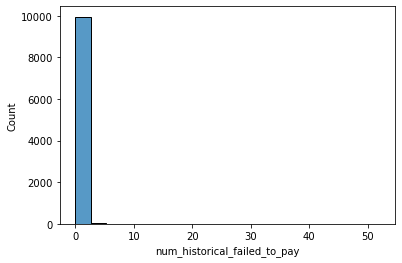

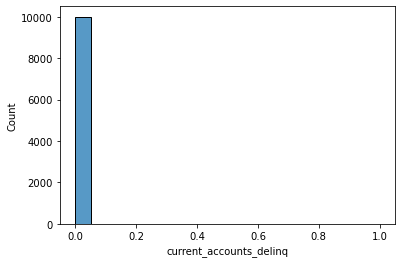

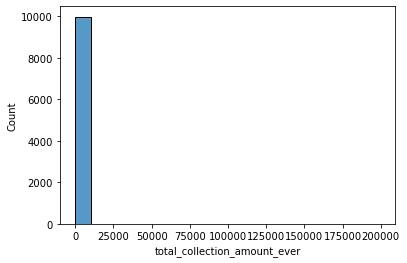

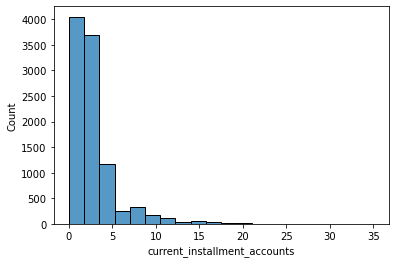

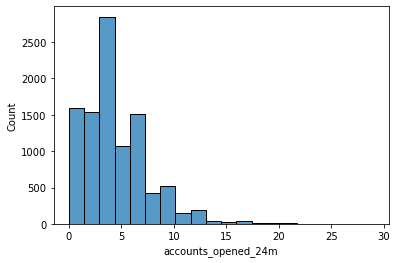

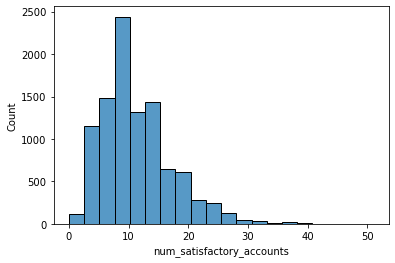

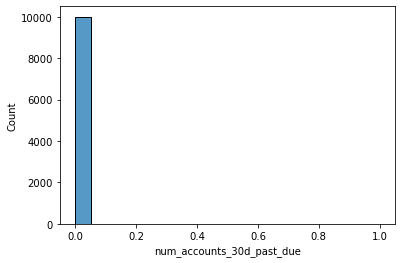

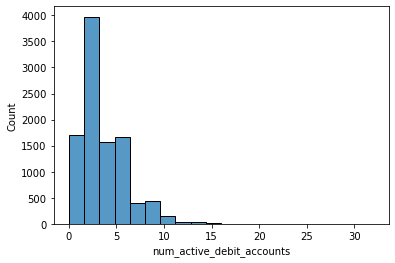

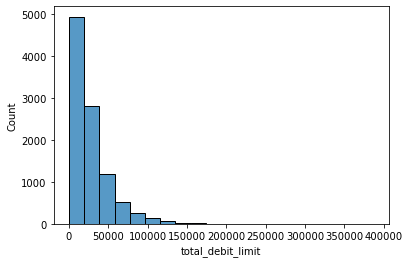

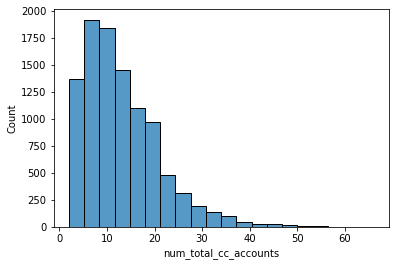

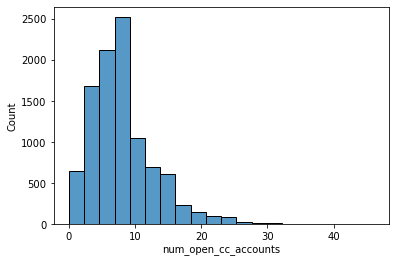

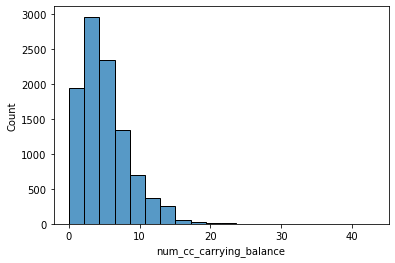

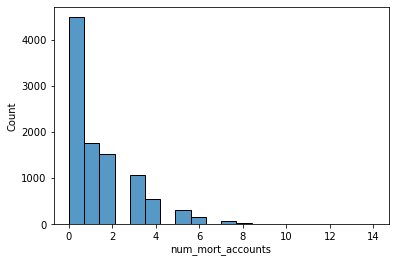

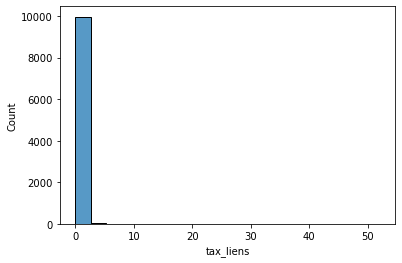

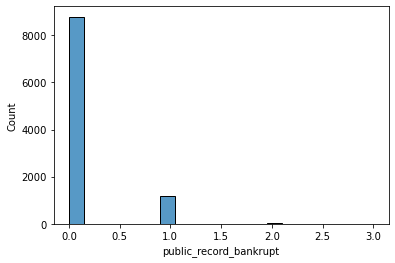

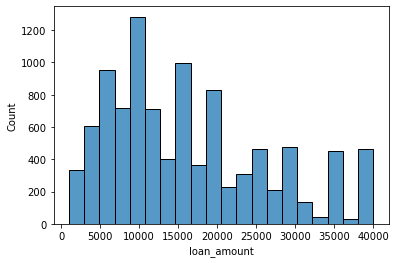

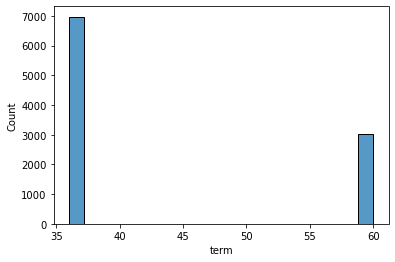

In [17]:
for col in meta_new[meta_new.Type == 'int64'].index:
    plt.figure()
    sns.histplot(data[col], bins=20)
    plt.show()

In [91]:
# for col in meta_new[meta_new.Type == 'object'].index:
#     print(data[col].value_counts())

`num_accounts_120d_past_due` is all 0, so it will be dropped 

`current_accounts_delinq` and `num_accounts_30d_past_due` both has only 1 value that is not 0, so they will be dropped

There are some variables that has extremely unbalanced distribution or have outliers (but may not be influential), such as `annual_income`, `debt_to_income`, `paid_late_fees`, `num_historical_failed_to_pay`, `total_collection_amount_ever`. 

`term` has only two values 36 and 60, though it is type of int64. 

In [19]:
meta_new = meta_new.drop(['num_accounts_120d_past_due', 'current_accounts_delinq', 'num_accounts_30d_past_due'])

<AxesSubplot:xlabel='interest_rate', ylabel='Count'>

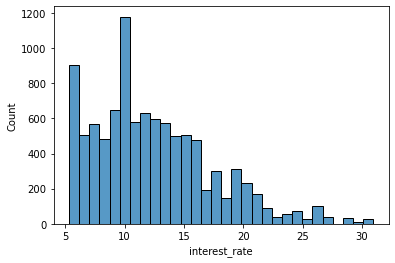

In [20]:
Y = data['interest_rate']
sns.histplot(Y, bins=30)

## Preliminary Feature Selection 

### Correlation of numerical features

In [21]:
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr 

In [22]:
# missing value?
data_nonan = data.dropna(axis=0, how='any')

In [23]:
correlation_dict = []
for col in meta_new[meta_new.Type == 'float64'].index:
    correlation, pvalue = pearsonr(data_nonan[col], data_nonan['interest_rate'])
    dict_tmp = {'Name': col, 'Correlation': correlation, 'P-value':pvalue}
    correlation_dict.append(dict_tmp)

In [24]:
pd.DataFrame(correlation_dict).set_index('Name').sort_values('P-value')

,Correlation,P-value
Name,,
paid_interest,0.4990,0.0000
annual_income,-0.2143,0.0022
months_since_last_credit_inquiry,-0.2012,0.0042
paid_principal,-0.1858,0.0083
installment,0.1153,0.1030
emp_length,-0.0717,0.3120
balance,0.0534,0.4514
account_never_delinq_percent,-0.0387,0.5858
paid_total,0.0280,0.6936


In [25]:
correlation_dict = []
for col in meta_new[meta_new.Type == 'int64'].index:
    correlation, pvalue = pearsonr(data_nonan[col], data_nonan['interest_rate'])
    dict_tmp = {'Name': col, 'Correlation': correlation, 'P-value':pvalue}
    correlation_dict.append(dict_tmp)

In [26]:
pd.DataFrame(correlation_dict).set_index('Name').sort_values('P-value')

,Correlation,P-value
Name,,
term,0.3060,0.0000
total_debit_limit,-0.2861,0.0000
inquiries_last_12m,0.2785,0.0001
total_credit_limit,-0.2314,0.0009
num_mort_accounts,-0.1986,0.0047
accounts_opened_24m,0.1833,0.0092
num_collections_last_12m,0.1267,0.0732
earliest_credit_line,0.1231,0.0817
delinq_2y,0.0802,0.2577


### XGBoost for numerical features

/Users/riliu/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[21:12:03] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




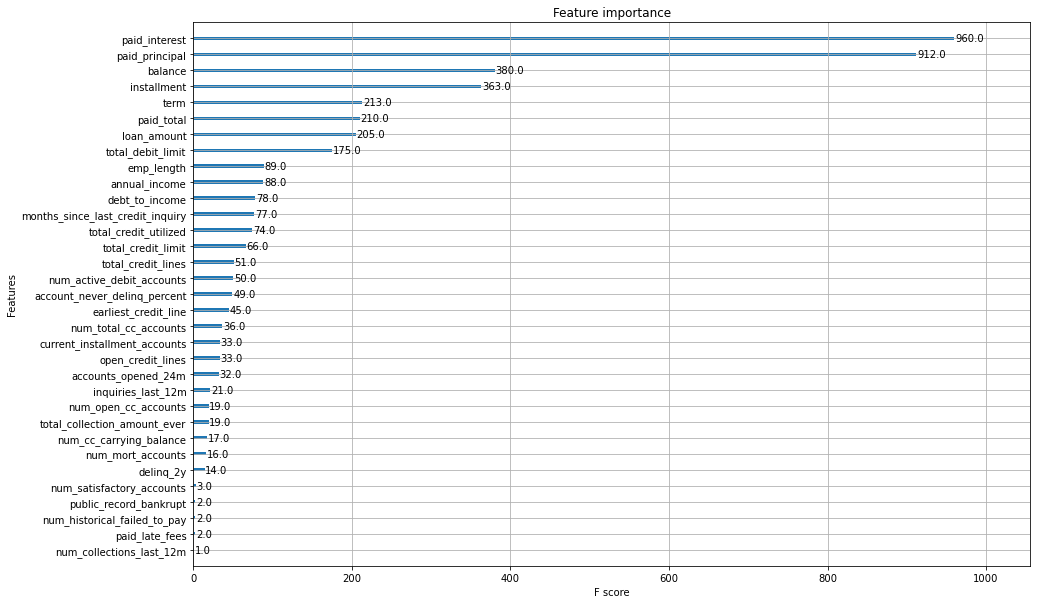

In [27]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data_xgb = []
data_xgb = data[meta_new[meta_new.Type == 'float64'].index.append(meta_new[meta_new.Type == 'int64'].index)]
labels = data['interest_rate']

X = []
for row in data_xgb.values:
    row = [float(x) for x in row]
    X.append(row)

y = [float(x) for x in labels]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

model = xgb.XGBRegressor(n_estimators=160, 
                         learning_rate=0.1, 
                         max_depth=5, 
                         silent=True, 
                         objective='reg:gamma')
                         

model.fit(X_train, y_train)
model.get_booster().feature_names =  list(data_xgb.columns)

fig,ax = plt.subplots(figsize=(15,10))
plot_importance(model, ax=ax)
plt.show()

The features that have significant correlation with `interest_rate` and the features that have feature importance higher than the 'elbow point' are selected currently. 

In [28]:
continuous_cols = ['paid_interest', 'annual_income', 'months_since_last_credit_inquiry', 'paid_principal', 'term', 'total_debit_limit', 'inquiries_last_12m', 'total_credit_limit', 'num_mort_accounts', 'accounts_opened_24m', 'balance', 'installment', 'paid_total', 'loan_amount']

<AxesSubplot:>

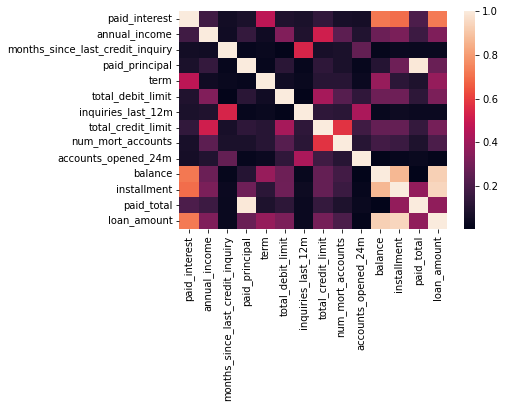

In [29]:
sns.heatmap(abs(data[continuous_cols].corr()))

The shallow color cells indicate the strong correlations between two features. 

'paid_total' with 'paid_principle', 'balance' and 'installment', 'loan_amount' with 'balance' and 'installment' are correlated pairs. 

`paid_total`, `installment` and `loan_amount` will be dropped as they have lower correlation or feature importance than their correlated ones. 

Now, we have 11 numerical features.

In [30]:
continuous_cols = ['paid_interest', 'annual_income', 'months_since_last_credit_inquiry', 'paid_principal', 'total_debit_limit', 'inquiries_last_12m', 'total_credit_limit', 'num_mort_accounts', 'accounts_opened_24m', 'balance']
len(continuous_cols)

10

<AxesSubplot:>

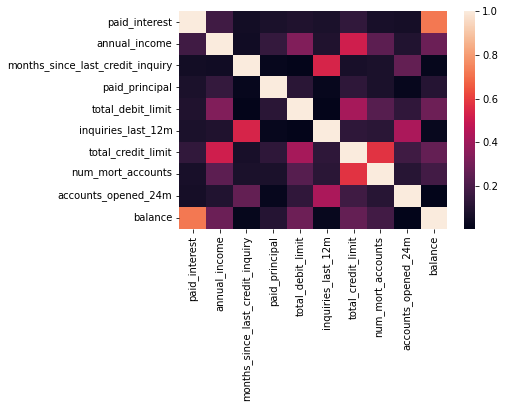

In [31]:
sns.heatmap(abs(data[continuous_cols].corr()))

In [32]:
data['term_new'] = 0
data.loc[data['term'] == 60, 'term_new'] = 1

### Categorical Features

In [33]:
state_group = pd.DataFrame(data.groupby('state')['interest_rate'].mean()).reset_index().reset_index()

/Users/riliu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


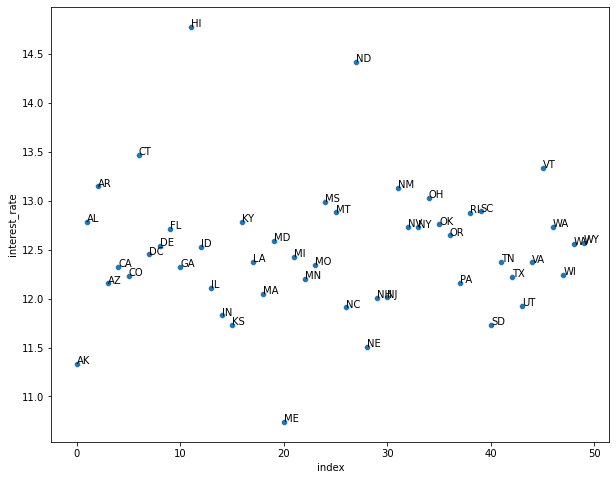

In [34]:
fig,ax = plt.subplots(figsize=(10,8))
sns.scatterplot(state_group['index'], state_group.interest_rate, ax=ax)
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

label_point(state_group['index'], state_group.interest_rate, state_group.state, plt.gca())  


In [35]:
from scipy import stats

In [36]:
stats.f_oneway(data[data.homeownership == 'MORTGAGE'].interest_rate, data[data.homeownership == 'RENT'].interest_rate, data[data.homeownership == 'OWN'].interest_rate)

F_onewayResult(statistic=32.649579903665376, pvalue=7.354893798699095e-15)

In [37]:
import pingouin as pg

In [38]:
catgorical_cols = list(meta_new[(meta_new.Type == 'object') & (meta_new.Unique < 15)].index)

In [39]:
anova_dict = []
for col in catgorical_cols:
    pvalue = pg.anova(data, 'interest_rate', col)['p-unc'][0]
    dict_tmp = {'Name': col, 'P-value': pvalue}
    anova_dict.append(dict_tmp)

In [40]:
pd.DataFrame(anova_dict).set_index('Name')

,P-value
Name,
homeownership,0.0000
verified_income,0.0000
loan_purpose,0.0000
application_type,0.0000
grade,0.0000
issue_month,0.5388
loan_status,0.0000
initial_listing_status,0.0000
disbursement_method,0.0000


In [41]:
pg.pairwise_tukey(data, 'interest_rate', 'homeownership')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,MORTGAGE,OWN,12.0589,12.3140,-0.2551,0.1535,-1.6621,0.2199,-0.0512
1,MORTGAGE,RENT,12.0589,12.9250,-0.8661,0.1079,-8.0304,0.0000,-0.1737
2,OWN,RENT,12.3140,12.9250,-0.6110,0.1575,-3.8788,0.0003,-0.1225


In [42]:
pg.pairwise_tukey(data, 'interest_rate', 'verified_income')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Not Verified,Source Verified,11.0995,12.5155,-1.4160,0.1107,-12.7870,0.0000,-0.2919
1,Not Verified,Verified,11.0995,14.3537,-3.2543,0.1297,-25.0915,0.0000,-0.6708
2,Source Verified,Verified,12.5155,14.3537,-1.8383,0.1265,-14.5369,0.0000,-0.3789


In [43]:
tukey_loanPurpose = pg.pairwise_tukey(data, 'interest_rate', 'loan_purpose').sort_values('p-tukey')

In [44]:
tukey_loanPurpose[tukey_loanPurpose['p-tukey'] < 0.05]

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
11,credit_card,debt_consolidation,11.4323,13.0095,-1.5772,0.1253,-12.5905,0.0000,-0.3182
21,debt_consolidation,home_improvement,13.0095,11.6203,1.3892,0.2022,6.8705,0.0000,0.2803
17,credit_card,other,11.4323,12.4258,-0.9934,0.1944,-5.1106,0.0000,-0.2004
22,debt_consolidation,house,13.0095,11.3699,1.6397,0.4091,4.0076,0.0036,0.3308
23,debt_consolidation,major_purchase,13.0095,11.9663,1.0433,0.2929,3.5613,0.0191,0.2105
19,credit_card,small_business,11.4323,13.0026,-1.5702,0.4554,-3.4482,0.0281,-0.3168
26,debt_consolidation,other,13.0095,12.4258,0.5838,0.1779,3.2819,0.0480,0.1178


In [45]:
pg.pairwise_tukey(data, 'interest_rate', 'application_type').sort_values('p-tukey')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,individual,joint,12.2992,13.1575,-0.8583,0.1400,-6.1310,0.0000,-0.1719


In [46]:
pg.pairwise_tukey(data, 'interest_rate', 'grade').sort_values('p-tukey')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,6.7426,10.5241,-3.7815,0.0301,-125.8136,0.0000,-3.4126
18,E,F,25.1034,29.4019,-4.2985,0.1576,-27.2800,0.0000,-3.8723
17,D,G,19.1135,30.8025,-11.6890,0.3212,-36.3968,0.0000,-10.5449
16,D,F,19.1135,29.4019,-10.2884,0.1484,-69.3445,0.0000,-9.2816
15,D,E,19.1135,25.1034,-5.9900,0.0672,-89.1633,0.0000,-5.4042
14,C,G,14.1767,30.8025,-16.6258,0.3206,-51.8659,0.0000,-15.0020
13,C,F,14.1767,29.4019,-15.2252,0.1471,-103.5307,0.0000,-13.7382
12,C,E,14.1767,25.1034,-10.9267,0.0642,-170.0898,0.0000,-9.8598
11,C,D,14.1767,19.1135,-4.9368,0.0362,-136.3150,0.0000,-4.4550
19,E,G,25.1034,30.8025,-5.6991,0.3255,-17.5082,0.0000,-5.1327


In [47]:
pg.pairwise_tukey(data, 'interest_rate', 'loan_status').sort_values('p-tukey')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
8,Current,Late (31-120 days),12.3109,16.5250,-4.2141,0.6141,-6.8627,0.0000,-0.8476
7,Current,Late (16-30 days),12.3109,16.8474,-4.5365,0.8081,-5.6140,0.0000,-0.9125
6,Current,In Grace Period,12.3109,15.6449,-3.3341,0.6095,-5.4702,0.0000,-0.6706
11,Fully Paid,Late (31-120 days),13.4119,16.5250,-3.1131,0.6555,-4.7489,0.0000,-0.6253
5,Current,Fully Paid,12.3109,13.4119,-1.1011,0.2407,-4.5750,0.0001,-0.2215
10,Fully Paid,Late (16-30 days),13.4119,16.8474,-3.4354,0.8400,-4.0897,0.0006,-0.6900
9,Fully Paid,In Grace Period,13.4119,15.6449,-2.2330,0.6513,-3.4288,0.0080,-0.4485
3,Charged Off,Late (16-30 days),12.3829,16.8474,-4.4645,2.0447,-2.1835,0.2455,-0.8823
4,Charged Off,Late (31-120 days),12.3829,16.5250,-4.1421,1.9761,-2.0962,0.2892,-0.8244
2,Charged Off,In Grace Period,12.3829,15.6449,-3.2621,1.9747,-1.6520,0.5639,-0.6493


In [48]:
pg.pairwise_tukey(data, 'interest_rate', 'initial_listing_status').sort_values('p-tukey')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,fractional,whole,13.4975,12.1936,1.3039,0.1297,10.0534,0.0000,0.2620


In [49]:
pg.pairwise_tukey(data, 'interest_rate', 'disbursement_method').sort_values('p-tukey')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Cash,DirectPay,12.6619,9.3880,3.2739,0.1912,17.1232,0.0000,0.6641


`state` to be recoded as 2 levels ('HI' or 'ND' and 'other')

`homeownership` to be rocoded as `Rent` and `other`

`verified_income` to be kept the 3 levels

`loan_purpose` to be recoded as `credit_card`, `debt_consolidation` and `other`

`grade` to be recoded as ordinal

`loan_status` to be recoded as `Current`, `Fully paid` and `other`

`application_type`, `initial_listing_status` and `disbursement_method` to be recoded as binary

In [50]:
# state
data['state_new'] = 0
data.loc[(data['state'] == 'HI') | (data['state'] == 'ND'), 'state_new'] = 1

In [51]:
# homeownership 
data['homeownership_new'] = 0
data.loc[data['homeownership'] == 'RENT', 'homeownership_new'] = 1

In [52]:
# verified_income
data['verified_income_sourceVerified'] = 0
data.loc[data['verified_income'] == 'Source Verified', 'verified_income_sourceVerified'] = 1

data['verified_income_Verified'] = 0
data.loc[data['verified_income'] == 'Verified', 'verified_income_Verified'] = 1


In [53]:
# loan purpose
data['loan_purpose_card'] = 0
data.loc[data['loan_purpose'] == 'credit_card', 'loan_purpose_card'] = 1

data['loan_purpose_consolid'] = 0
data.loc[data['loan_purpose'] == 'debt_consolidation', 'loan_purpose_consolid'] = 1

In [54]:
# grade
data['grade_new'] = 0
data.loc[data['grade'] == 'A', 'grade_new'] = 1
data.loc[data['grade'] == 'B', 'grade_new'] = 2
data.loc[data['grade'] == 'C', 'grade_new'] = 3
data.loc[data['grade'] == 'D', 'grade_new'] = 4
data.loc[data['grade'] == 'E', 'grade_new'] = 5
data.loc[data['grade'] == 'F', 'grade_new'] = 6
data.loc[data['grade'] == 'G', 'grade_new'] = 7

In [55]:
# loan_status
data['loan_status_current'] = 0
data.loc[data['loan_status'] == 'Current', 'loan_status_current'] = 1

data['loan_status_paid'] = 0
data.loc[data['loan_status'] == 'Fully Paid', 'loan_status_paid'] = 1

In [56]:
# application_type
data['application_type_new'] = 0
data.loc[data['application_type'] == 'joint', 'application_type_new'] = 1

In [57]:
# initial_listing_status
data['initial_listing_status_new'] = 0
data.loc[data['initial_listing_status'] == 'fractional', 'initial_listing_status_new'] = 1

In [58]:
# disbursement_method
data['disbursement_method_new'] = 0
data.loc[data['disbursement_method'] == 'DirectPay', 'disbursement_method_new'] = 1

### XGBoost for categorical features

In [59]:
categorical_cols = ['state_new', 'homeownership_new', 'verified_income_sourceVerified', 'verified_income_Verified', 'loan_purpose_card', 'loan_purpose_consolid', 'grade_new', 'loan_status_current', 'loan_status_paid', 'application_type_new', 'initial_listing_status_new', 'disbursement_method_new']
len(categorical_cols)

12

[21:12:08] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




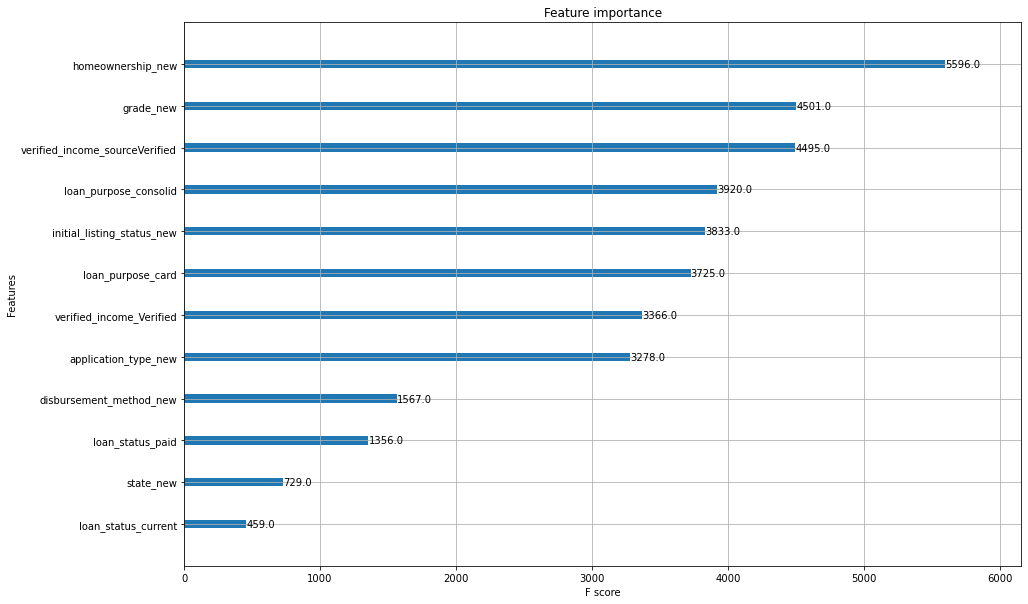

In [60]:
data_xgb = []
data_xgb = data[categorical_cols]
labels = data['interest_rate']

X = []
for row in data_xgb.values:
    row = [float(x) for x in row]
    X.append(row)

y = [float(x) for x in labels]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

model = xgb.XGBRegressor(n_estimators=300, 
                         learning_rate=0.1, 
                         max_depth=15, 
                         silent=True, 
                         objective='reg:gamma')
                         

model.fit(X_train, y_train)
model.get_booster().feature_names =  list(data_xgb.columns)

fig,ax = plt.subplots(figsize=(15,10))
plot_importance(model, ax=ax)
plt.show()

According to feature importance, there are 8 recoded categorical features remained currently. 

In [61]:
categorical_cols = ['homeownership_new', 'verified_income_sourceVerified', 'verified_income_Verified', 'loan_purpose_card', 'loan_purpose_consolid', 'grade_new', 'application_type_new', 'initial_listing_status_new', 'term_new']
len(categorical_cols)

9

## Current Feature Set

In [62]:
feature_cols = continuous_cols+categorical_cols
len(feature_cols)

19

In [63]:
meta_dict = []
for col in feature_cols:
    # if data[col].dtype == 'int64':
    #     ordinal_cols.append(col)
    type = data[col].dtype
    unique = 0
    if type == 'object':
        unique = len(data[col].unique())
    NAs = data[col].isnull().sum()
    NA_prop = NAs / len(data[col]) * 100
    dict_tmp = {'Name': col, 'Type': type, 'Unique': unique, 'NAs': NAs, 'NA%': NA_prop}
    meta_dict.append(dict_tmp)

In [64]:
pd.DataFrame(meta_dict).set_index('Name')

,Type,Unique,NAs,NA%
Name,,,,
paid_interest,float64,0,0,0.0000
annual_income,float64,0,0,0.0000
months_since_last_credit_inquiry,float64,0,1271,12.7100
paid_principal,float64,0,0,0.0000
total_debit_limit,int64,0,0,0.0000
inquiries_last_12m,int64,0,0,0.0000
total_credit_limit,int64,0,0,0.0000
num_mort_accounts,int64,0,0,0.0000
accounts_opened_24m,int64,0,0,0.0000


In [65]:
# for col in feature_cols:
#     plt.figure()
#     sns.histplot(data[col], bins=20)
#     plt.show()

In [66]:
data = data.fillna({'months_since_last_credit_inquiry': 0})

## Modelling

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from  sklearn.metrics import  mean_squared_error as MSE
from sklearn.metrics import r2_score

In [68]:
data_new = data.copy()

In [69]:
for col in continuous_cols:
    # print(sum(data[col] < np.quantile(data[col], 0.999)))
    data_new = data_new.loc[data_new[col] < np.quantile(data_new[col], 0.99), :]

In [70]:
X = data[feature_cols].values
y = data['interest_rate'].values

### Baseline Model

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

In [72]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred = reg.predict(X_test)

In [74]:
reg.score(X_test, y_test)

0.9488573960130858

In [75]:
mse=MSE(y_pred,y_test)
print('RMSE: ', np.sqrt(mse))

RMSE:  1.142034911772287


In [76]:
r_2 = r2_score(y_pred = y_pred, y_true = y_test)
print('R-squared: ', r_2)

R-squared:  0.9488573960130858


### Lasso

In [77]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

In [79]:
lasso = LassoCV(alphas = [0,0.1,0.01, 0.001, 0.0001])
lasso.fit(X_train, y_train)

/Users/riliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/riliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4004.469531495197, tolerance: 13.895408627212507
  model = cd_fast.enet_coordinate_descent_gram(
/Users/riliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/riliu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number

LassoCV(alphas=[0, 0.1, 0.01, 0.001, 0.0001])

In [80]:
lasso.alpha_

0.001

In [81]:
lasso.score(X_test, y_test)

0.948862734023154

In [82]:
y_pred = lasso.predict(X_test)

In [83]:
mse=MSE(y_pred=y_pred, y_true=y_test)
print('RMSE: ', np.sqrt(mse))

RMSE:  1.141975310261384


In [84]:
lasso.score(X_train, y_train)

0.941553205597439

In [85]:
feat_importance = pd.DataFrame({'column': data[feature_cols].columns, 'coef':list(lasso.coef_)})
feat_importance['importance'] = np.abs(feat_importance.coef)
feat_importance = feat_importance.sort_values(by='importance', ascending=False)
feat_importance

,column,coef,importance
15,grade_new,3.9455,3.9455
12,verified_income_Verified,0.2187,0.2187
18,term_new,0.0804,0.0804
13,loan_purpose_card,-0.0505,0.0505
11,verified_income_sourceVerified,0.0496,0.0496
17,initial_listing_status_new,-0.0460,0.0460
10,homeownership_new,0.0441,0.0441
14,loan_purpose_consolid,0.0413,0.0413
7,num_mort_accounts,-0.0362,0.0362
5,inquiries_last_12m,0.0169,0.0169


In [86]:
# feature_cols = list(feat_importance.loc[feat_importance.importance > 0.001, 'column'].values)
feature_cols

['paid_interest',
 'annual_income',
 'months_since_last_credit_inquiry',
 'paid_principal',
 'total_debit_limit',
 'inquiries_last_12m',
 'total_credit_limit',
 'num_mort_accounts',
 'accounts_opened_24m',
 'balance',
 'homeownership_new',
 'verified_income_sourceVerified',
 'verified_income_Verified',
 'loan_purpose_card',
 'loan_purpose_consolid',
 'grade_new',
 'application_type_new',
 'initial_listing_status_new',
 'term_new']

### Regression Tree

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [88]:
tree = DecisionTreeRegressor(random_state=10)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=10)

In [89]:
tree.score(X_test, y_test)

0.9596474689613324

In [90]:
y_pred = tree.predict(X_test)
MSE(y_pred=y_pred, y_true=y_test)

1.0290742333333338